# Data Exploratory 

In [2]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Read the csv file 

df=pd.read_csv('showwcase_sessions.csv')
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [4]:
df.info()

# There are 300 rows and 14 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
session_id                300 non-null float64
customer_id               300 non-null float64
login_date                300 non-null object
projects_added            300 non-null object
likes_given               300 non-null object
comment_given             300 non-null object
inactive_status           300 non-null object
bug_occured               300 non-null object
session_projects_added    300 non-null float64
session_likes_given       299 non-null float64
session_comments_given    300 non-null float64
inactive_duration         300 non-null float64
bugs_in_session           300 non-null float64
session_duration          300 non-null float64
dtypes: float64(8), object(6)
memory usage: 33.2+ KB


In [5]:
df.nunique(axis=0)

#Ther are 300 unique session id in this dataset but there is only 48 unique customer id so it means that there are only 48 
#customers in this dataset


session_id                300
customer_id                48
login_date                 30
projects_added              2
likes_given                 2
comment_given               2
inactive_status             2
bug_occured                 2
session_projects_added      8
session_likes_given        28
session_comments_given      9
inactive_duration         170
bugs_in_session             6
session_duration          279
dtype: int64

# Examine the no of bugs in session 

In [12]:
#Find out tje mean and max of bug_in sessions 
df['bugs_in_session'].describe()

# We can see that the mean number of bugs in sessions is 1.2333



count    300.000000
mean       1.233333
std        1.757608
min        0.000000
25%        0.000000
50%        0.000000
75%        2.250000
max        5.000000
Name: bugs_in_session, dtype: float64

In [13]:
df['bugs_in_session'].value_counts()


0.0    184
2.0     28
4.0     28
5.0     24
3.0     23
1.0     13
Name: bugs_in_session, dtype: int64

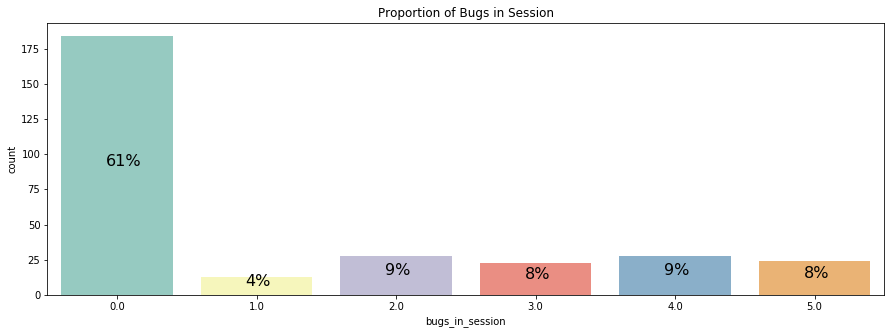

In [14]:
# Proportion of bugs in session 

import seaborn as sb

plt.figure(figsize=(15,5))
ax=sb.countplot(data=df,x='bugs_in_session', palette='Set3', linewidth=1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.5, height/2, '{:.0%}'.format(float(height/len(df['bugs_in_session']))),fontsize=16)
plt.title("Proportion of Bugs in Session")
plt.show()

# We can see that 61% of session does not encounter any bugs
# However, we can see that ther are 25% of sessions has 3 bugs or more in a session, this would be an issue that we have 
# to take care of in order to minimize the exist of bugs 

# Examine the whether users added project during their session 

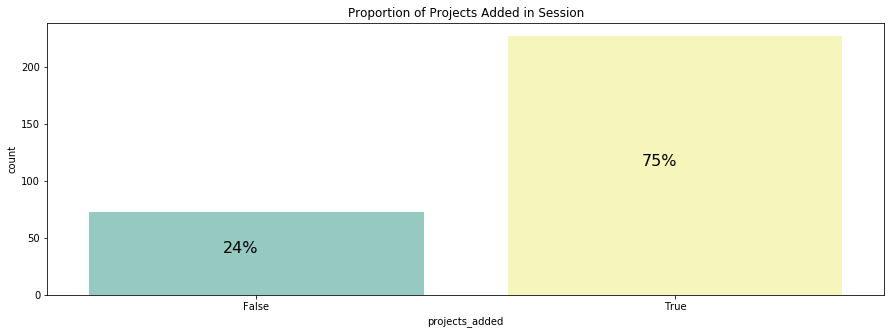

In [15]:
# Proportion of project added during session

import seaborn as sb

plt.figure(figsize=(15,5))
ax=sb.countplot(data=df,x='projects_added', palette='Set3', linewidth=1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.5, height/2, '{:.0%}'.format(float(height/len(df['projects_added']))),fontsize=16)
plt.title("Proportion of Projects Added in Session")
plt.show()

# We can see that 75 % of session with added project 

In [16]:
df['session_projects_added'].value_counts()


1.0    75
0.0    73
2.0    71
3.0    68
4.0     6
5.0     4
6.0     2
9.0     1
Name: session_projects_added, dtype: int64

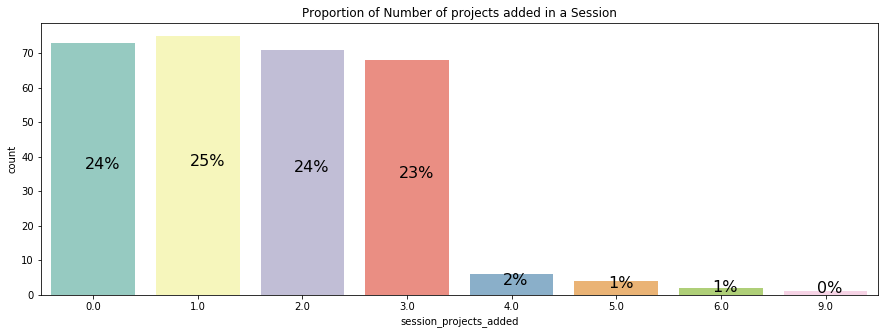

In [18]:
# Proportion of No of project added in session 

import seaborn as sb

plt.figure(figsize=(15,5))
ax=sb.countplot(data=df,x='session_projects_added', palette='Set3', linewidth=1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.5, height/2, '{:.0%}'.format(float(height/len(df['session_projects_added']))),fontsize=16)
plt.title("Proportion of Number of projects added in a Session")
plt.show()

# We can see that there are 25% of session have one project uploaded. Also, there are 96% of session has 3 or less than 3 projects 
# uploaded during the session 

# Examine the Session Duration 

In [27]:
df['session_duration'].describe()
# The mean session duration is 1186.763 minutes 



count     300.000000
mean     1186.763333
std       688.632138
min        10.000000
25%       611.250000
50%      1152.000000
75%      1778.000000
max      2395.000000
Name: session_duration, dtype: float64

In [28]:
df['session_duration'].median()

# The median session is 1152 minutes 

1152.0

In [30]:
df.groupby('comment_given')['session_duration'].describe()

# The session duration is longer for those session with comment_given 


,count,mean,std,min,25%,50%,75%,max
comment_given,,,,,,,,
False,75.0,1165.253333,689.049876,11.0,572.5,1157.0,1732.5,2336.0
True,225.0,1193.933333,689.880114,10.0,613.0,1138.0,1790.0,2395.0


In [35]:
df.groupby('comment_given')['session_duration'].median()

# The median of session duration is shorter for those session with comment_given 


comment_given
False    1157.0
True     1138.0
Name: session_duration, dtype: float64

# Examine the like was given from users 

In [37]:
df.groupby('customer_id')['session_likes_given'].describe()['max'].nlargest(10)

# discover the customer who get most like on their post 
# We may design rewards program for customer that can get most like within certain period

customer_id
23404.0    27.0
29345.0    27.0
38459.0    27.0
43549.0    27.0
73245.0    27.0
87323.0    27.0
93464.0    27.0
12407.0    26.0
12940.0    26.0
23579.0    26.0
Name: max, dtype: float64

 # Examine inactive session duration 

In [40]:
df['inactive_duration'].describe()

count     300.000000
mean      732.933333
std       838.143032
min         0.000000
25%         0.000000
50%       313.500000
75%      1524.750000
max      2480.000000
Name: inactive_duration, dtype: float64

In [41]:
df['inactive_duration'].median()

313.5

In [43]:
# Users with most inactive duration 
df.groupby('customer_id')['inactive_duration'].describe()['max'].nlargest(10)


customer_id
40235.0    2480.0
29375.0    2474.0
43086.0    2437.0
73524.0    2429.0
43057.0    2427.0
12496.0    2426.0
23985.0    2402.0
96254.0    2394.0
38459.0    2376.0
73245.0    2360.0
Name: max, dtype: float64